In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('customer_churn.csv')
df = df.iloc[:,df.columns!= "customerID"]
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [4]:
# converting data into numbers
#pd.to_numeric(df.TotalCharges, errors='coerce')
#this errors='coerce' ignores all the empty cells

In [5]:
#df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

In [6]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [26]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [8]:
df1.TotalCharges.dtypes

dtype('float64')

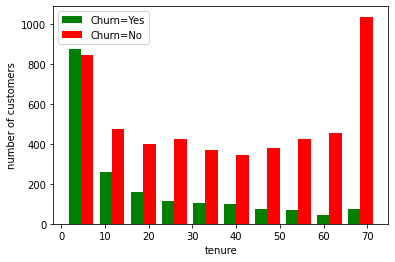

In [9]:
churn_no = df1[df1.Churn=='No'].tenure
churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel('number of customers')
plt.hist([churn_yes,churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [10]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"{column}:{df[column].unique()}")

In [29]:
df1.replace('No internet service','No',inplace=True) #replacing similar value with no
df1.replace('No phone service','No',inplace=True)

In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [31]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)
df1['gender'].replace({'Female':0,'Male':1},inplace=True)    

In [14]:
for column in df1:
    print(f"{column}:{df1[column].unique()}")

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [15]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
for column in df2:
    print(f"{column}:{df2[column].unique()}")
# this get_dummies method creates hot encoding vector for inputted columns

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [16]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [17]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_test.shape

(1407, 26)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 1ms/step - loss: 0.5753 - accuracy: 0.6857
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7897
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7989
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8014
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8046
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8039
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8020
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8053
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8048
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8048

In [21]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7875


[0.4432348608970642, 0.7874911427497864]

In [22]:
y_pred = model.predict(X_test)
prediction = []
for i in y_pred:
    if i >= 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [23]:
prediction[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [24]:
y_pred[4]

array([0.5021092], dtype=float32)